# Week01-1 Tokenizer

切詞方式和tokenizer demo

## 相關模組安裝
1. 斷詞libary: jieba「結巴」→ 中文分詞：網路寫說做最好的Python中文斷詞<br>
2. gensim: 文檔相似度計算和詞向量表示等自然語言處理(NLP)任務的Python庫。
3. transformers: NLP模組

In [1]:
!pip install jieba

     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
      --------------------------------------- 0.3/19.2 MB ? eta -:--:--
     - ------------------------------------- 0.5/19.2 MB 985.5 kB/s eta 0:00:19
     - -------------------------------------- 0.8/19.2 MB 1.3 MB/s eta 0:00:15
     -- ------------------------------------- 1.0/19.2 MB 1.3 MB/s eta 0:00:15
     -- ------------------------------------- 1.3/19.2 MB 1.2 MB/s eta 0:00:15
     -- ------------------------------------- 1.3/19.2 MB 1.2 MB/s eta 0:00:15
     --- ------------------------------------ 1.8/19.2 MB 1.2 MB/s eta 0:00:15
     --- ------------------------------------ 1.8/19.2 MB 1.2 MB/s eta 0:00:15
     ---- ----------------------------------- 2.1/19.2 MB 1.2 MB/s eta 0:00:15
     ---- ----------------------------------- 2.4/19.2 MB 1.2 MB/s eta 0:00:15
     ----- ---------------------------------- 2.6/19.2 MB 1.2 MB/s eta 0:00:15
     ------ --------------------------------- 2.9/19.2 MB 1.2 MB/

DEPRECATION: Loading egg at c:\users\glanb\anaconda3\lib\site-packages\fonttools-4.53.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\glanb\anaconda3\lib\site-packages\mefamo_mediapipefacemocap-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
!pip install gensim

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 932.9 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/14.8 MB 987.4 kB/s eta 0:00:15
   -- ------------------------------------- 1.0/14.8 MB 1.1 MB/s eta 0:00:13
   --- ------------------------------------ 1.3/14.8 MB 1.2 MB/s eta 0:00:12
   ---- ----------------------------------- 1.6/14.8 MB 1.2 MB/s eta 0:00:12
   ---- ----------------------------------- 1.8/14.8 MB 1.2 MB/s eta 0:00:11
   ----- ---------------------------------- 2.1/14.8 MB 1.2 MB/s eta 0:00:12
   ----- ---------------------------------- 2.1/14.8 MB 1.2 MB/s eta 0:00:12
   ------ --------------------------

DEPRECATION: Loading egg at c:\users\glanb\anaconda3\lib\site-packages\fonttools-4.53.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\glanb\anaconda3\lib\site-packages\mefamo_mediapipefacemocap-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires torch<2.3.0,>=2.2.0, but you have torch 2.4.0+cu124 which is incompatible.
facenet-pytorch 2.6.0 requires torchvision<0.18.0,>=0.17.0, but you have torchvision 0.19.0 which is incompatible.


In [24]:
!pip install transformers

DEPRECATION: Loading egg at c:\users\glanb\anaconda3\lib\site-packages\fonttools-4.53.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\glanb\anaconda3\lib\site-packages\mefamo_mediapipefacemocap-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


## 正式介紹
大家可能覺得斷詞很簡單<br>
在英文上可以用space來切word，但英文有些字是連在一起來有那個意思，但純粹切word很容易，所以靠word可以達到最小單位，讓模型自己去學習字跟字之間的關係。<br>
- Do you have time? → "Do","you","have","time","you"
- Do you have the time? → "Do","you","have","the","time"

但中文的斷詞超級難，以下是一些範例。<br>
- 範例1:<br>
黃志勝是Tommy→<br>
(1) "黃志勝"、"是"、"Tommy"<br>
(2) "黃"、"志勝"、"是"、"Tommy"<br>
粗粒度的分詞就是「"黃志勝"」，細粒度的分詞可能是「"黃"，"志勝"」<br>
- 範例2:<br>
美國會通過XXX法案→<br> 
(1) "美國"、"會"、"通過"、"XXX"、"法案"<br>
(2) "美"、"國會"、"通過"、"XXX"、"法案"<br>

內容參考: https://alu2019.home.blog/2021/03/25/edge-ai-bert-for-fen-ci/

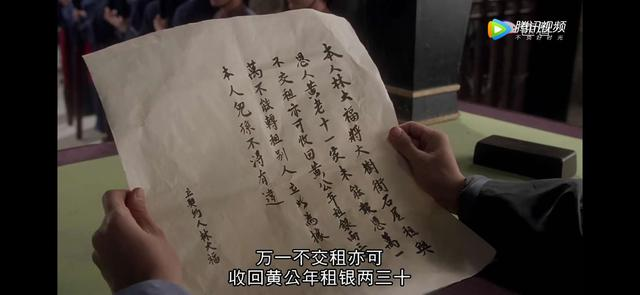

**紙本原文<br>
本人林大福將大樹街石屋租與<br>
恩人黃老十一家未能報恩萬一<br>
不交租亦可收回黃公年租銀兩三十<br>
萬不能轉租別人立此為據<br>
本人兒孫不得有違<br>

包龍星版本:<br>
本人林大福，將大樹街石屋租與恩人黃老十一家，未能報恩，<br>
萬一不交租亦可，收回黃公年租銀兩三十，萬不能轉租別人，<br>
立此為據，本人兒孫不得有違<br>

方唐鏡版本:<br>
本人林大福，將大樹街石屋租于恩人黃老十一家，未能報恩，<br>
萬一不交租，亦可收回，黃公年租銀兩三十萬，不能轉租別人，<br>
立此為據，本人兒孫不得有違<br>

In [16]:
import jieba
sentences = [
    list(jieba.cut('我是黃志勝')),
    list(jieba.cut('黃志勝是Tommy')),
    list(jieba.cut('加州大學聖地牙哥分校')),
    list(jieba.cut('中華人民共和國')),
    list(jieba.cut('美國會通過對台售武法案')),
    list(jieba.cut('我在義隆電上班')),
    list(jieba.cut('我在義隆電子上班')),
    list(jieba.cut('本人林大福將大樹街石屋租與恩人黃老十一家未能報恩萬一不交租亦可收回黃公年租銀兩三十萬不能轉租別人立此為據本人兒孫不得有違')),
]
for sentence in sentences:
    print(sentence)

['我', '是', '黃', '志勝']
['黃', '志勝', '是', 'Tommy']
['加州', '大學聖', '地牙哥', '分校']
['中華', '人民', '共和', '國']
['美國會', '通過', '對', '台售武', '法案']
['我', '在', '義隆電', '上班']
['我', '在', '義隆', '電子', '上班']
['本人', '林', '大福', '將大樹街', '石屋', '租', '與', '恩人', '黃', '老', '十一家', '未能', '報恩萬', '一', '不', '交租', '亦可', '收回', '黃', '公年', '租', '銀', '兩', '三十', '萬', '不能', '轉租別', '人立', '此', '為', '據', '本人', '兒孫', '不得', '有違']


In [17]:
from gensim.models import Word2Vec

# 訓練詞向量模型
model = Word2Vec(sentences, window=5, min_count=1, workers=4)

# 獲取所有詞
vocab = model.wv.index_to_key
print(vocab)
# 獲取所有詞向量
vectors = model.wv[vocab]
print(vectors)
print(vectors.shape)


['黃', '我', '是', '志勝', '租', '本人', '上班', '在', '通過', '電子', '義隆', '義隆電', '法案', '台售武', '對', '國', '美國會', '大福', '共和', '人民', '中華', '分校', '地牙哥', '大學聖', '加州', 'Tommy', '林', '有違', '不得', '石屋', '兒孫', '據', '為', '此', '人立', '轉租別', '不能', '萬', '三十', '兩', '銀', '公年', '收回', '亦可', '交租', '不', '一', '報恩萬', '未能', '十一家', '老', '恩人', '與', '將大樹街']
[[-5.5579795e-04  2.3960849e-04  5.1095900e-03 ... -7.0242025e-03
   9.0550625e-04  6.3683391e-03]
 [-8.6247697e-03  3.6663162e-03  5.1925713e-03 ... -2.3867264e-03
  -9.5100114e-03  4.5044348e-03]
 [ 9.1891045e-05  3.0742467e-03 -6.8135471e-03 ...  5.1021617e-04
   8.2112430e-03 -7.0192600e-03]
 ...
 [ 9.9361315e-03  2.4096393e-03  5.1257894e-03 ... -5.6354632e-03
  -8.3348006e-03 -1.9009337e-03]
 [ 6.9790934e-03 -2.0951152e-04 -7.9470100e-03 ...  7.2539425e-03
  -3.7568689e-03 -7.4346815e-03]
 [-3.3544810e-03 -6.8809525e-03  6.4960602e-03 ...  3.7366026e-03
   8.0168666e-03 -2.5130168e-03]]
(54, 100)


# 我提供Tokenizer

In [18]:
import pickle
class Tokenizer:
    def __init__(self, vocab_path, is_en=True):
        with open(vocab_path,'rb') as f:
            _, word2index, index2word = pickle.load(f)
        if is_en: 
            word2index = {word: index + 1 for word, index in word2index.items()}
            word2index.update({"<PAD>":0})
            index2word = ["<PAD>"] + index2word
        else:
            word2index = {word: index + 3 for word, index in word2index.items()}
            word2index.update({"<PAD>":0, "<BOS>": 1, "<EOS>":2})
            index2word = ["<PAD>", "<BOS>", "<EOS>"] + index2word
        self.word2index = word2index
        self.index2word = index2word
        self.PAD = 0
        self.BOS = 1
        self.EOS = 2
    
    def encode(self, sentence):
        return [self.word2index[w] for w in sentence]
    
    def decode(self, indexes):
        return [self.index2word[index] for index in indexes]

    def length(self):
        return len(self.index2word)

In [20]:
print('English Encoding')
tokenizer_en = Tokenizer(vocab_path="./dataset/en.vec", is_en=True)
print(tokenizer_en.encode("hello,world!"))
print(tokenizer_en.encode("hello, world!"))
print(tokenizer_en.encode("hello,Chih-Sheng Huang"))

print('Chinese Encoding')
tokenizer_cn = Tokenizer(vocab_path="./dataset/ch.vec", is_en=False)
print(tokenizer_cn.encode("你好, 世界!"))
print(tokenizer_cn.encode("你好,世界!"))
print(tokenizer_cn.encode("你好,北科大"))
print(tokenizer_cn.encode("你好,黃志勝"))
print(tokenizer_cn.encode("美國會通過對台售武法案"))


English Encoding
[9, 2, 11, 11, 3, 33, 17, 3, 10, 11, 12, 52]
[9, 2, 11, 11, 3, 33, 1, 17, 3, 10, 11, 12, 52]
[9, 2, 11, 11, 3, 33, 40, 9, 7, 9, 54, 32, 9, 2, 8, 18, 1, 30, 14, 5, 8, 18]
Chinese Encoding
[7, 36, 389, 270, 351, 494, 923]
[7, 36, 389, 351, 494, 923]
[7, 36, 389, 1097, 677, 63]
[7, 36, 389, 2330, 1285, 816]
[185, 273, 57, 323, 147, 135, 586, 1382, 1752, 79, 727]


In [21]:
print(tokenizer_cn.encode("本人林大福將大樹街石屋租與恩人黃老十一家未能報恩萬一不交租亦可收回黃公年租銀兩三十萬不能轉租別人立此為據本人兒孫不得有違"))


KeyError: '亦'

In [22]:
tokenizer_en.word2index
len(tokenizer_en.index2word)

78

In [23]:
# tokenizer_cn.word2index
len(tokenizer_cn.index2word)

3592

## 用transformers模組來進行
https://medium.com/@abdallahashraf90x/tokenization-in-nlp-all-you-need-to-know-45c00cfa2df7

In [24]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

input_text = "I like movie"

encoded_text = tokenizer(input_text)
print(encoded_text)

{'input_ids': [101, 1045, 2066, 3185, 102], 'attention_mask': [1, 1, 1, 1, 1]}


In [41]:
from transformers import GPT2Tokenizer
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)


input_texts = ["Food Panda",
    "美國會通過對台售武法案",
    "本人林大福將大樹街石屋租與恩人黃老十一家未能報恩萬一不交租亦可收回黃公年租銀兩三十萬不能轉租別人立此為據本人兒孫不得有違"]

for input_text in input_texts:
    inputs = tokenizer(input_text, return_tensors="pt")
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    decode_text = tokenizer.decode(input_ids[0])
    print('input:{}'.format(input_text))
    print('input ID:{}'.format(input_ids))
    print('Decode:{}'.format(decode_text))


input:Food Panda
input ID:tensor([[24602, 41112]])
Decode:Food Panda
input:美國會通過對台售武法案
input ID:tensor([[  163,   122,   236, 28839,   233, 17312,   225, 34460, 21253,   223,
           236, 22887,   235, 20998,   108,   161,   242,   106, 49476, 37345,
           243,   162,    94,   230]])
Decode:美國會通過對台售武法案
input:本人林大福將大樹街石屋租與恩人黃老十一家未能報恩萬一不交租亦可收回黃公年租銀兩三十萬不能轉租別人立此為據本人兒孫不得有違
input ID:tensor([[17312,   105, 21689,   162,   252,   245, 32014,   163,    99,   237,
         22887,   229, 32014,   162,   101,   117, 26193,   245,   163,   253,
           111,   161,   109,   233,   163,   100,   253, 48958,   229,   162,
           223,   102, 21689,   165,   119,   225, 32003,   223, 39355,   223,
         31660, 22522,   114, 17312,   103, 47797,   121,   161,   254,   109,
           162,   223,   102,   164,   238,   105, 31660, 38834, 12859,    97,
           163,   100,   253, 12859,    99, 20998,   107,   162,   242,   114,
         32368,   252,   165,   119,   225, 17739,   105, 3

In [58]:
import torch
input_string = torch.tensor([1,2,3,4,5,6])
decode_text = tokenizer.decode(input_string)
print('Decode:{}'.format(decode_text))

input_string = torch.tensor([17312,   105, 21689,   162,   252,   245, 32014,   163,    99,   237])
decode_text = tokenizer.decode(input_string)
print('Decode:{}'.format(decode_text))


input_string = torch.tensor([17312,   105])
decode_text = tokenizer.decode(input_string)
print('Decode:{}'.format(decode_text))

input_string = torch.tensor([21689,   162,   252,   245])
decode_text = tokenizer.decode(input_string)
print('Decode:{}'.format(decode_text))


Decode:"#$%&'
Decode:本人林大福
Decode:本
Decode:人林


In [57]:
from transformers import GPT2LMHeadModel

model = GPT2LMHeadModel.from_pretrained(model_name)
model.eval()

# 输入文本
input_text = "Panda is a national animal of which country?"
inputs = tokenizer(input_text, return_tensors="pt")
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

# 设置 pad_token_id
pad_token_id = tokenizer.eos_token_id

# 生成文本
with torch.no_grad():
    outputs = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=100,  # 生成文本的最大长度
        pad_token_id=pad_token_id,
        num_return_sequences=1,  # 生成的序列数量
        no_repeat_ngram_size=1,  # 避免重复的n-gram
        do_sample=True,  # 启用采样
        top_k=50,  # top-k采样
        top_p=0.95,  # top-p采样
        temperature=0.1  # 控制生成文本的多样性
    )

print(outputs[0])
# 将生成的 token IDs 转换为文本
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_text)

tensor([   47,  5282,   318,   257,  2260,  5044,   286,   543,  1499,    30,
          198,   464,  3280,   284,   428,  1808,  8338,   319,   262,  4732,
           13,   554,  2807,    11,   810,   612,   389,   867,  4693,   326,
          423,   587, 26026,  3474,   329,  4138,   393,  5242,   812,   290,
          617,  4695,   884,   355, 25368,   460,   307,  1043,   287, 20038,
          357,  3826, 11291,   352,   828,   340,   561,  1283,  6397,   407,
          691,   611,   484,   547, 33592,   656,  5384,   475,   635,   780,
          511,  8513, 16029,   714,  1487,   625,   640,  2233,  1111,  6467,
         5400,  1022,  9684,  1626,  1123,  1448,   338, 11756,  7652,    26,
         2158,   777,  2458,   743,  3051,   379,  1180,  1661,  1141,  1692])


In [60]:
# 输入文本
input_text = "what is apple?"
inputs = tokenizer(input_text, return_tensors="pt")
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

# 设置 pad_token_id
pad_token_id = tokenizer.eos_token_id

# 生成文本
with torch.no_grad():
    outputs = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=100,  # 生成文本的最大长度
        pad_token_id=pad_token_id,
        num_return_sequences=1,  # 生成的序列数量
        no_repeat_ngram_size=1,  # 避免重复的n-gram
        do_sample=True,  # 启用采样
        top_k=50,  # top-k采样
        top_p=0.95,  # top-p采样
        temperature=0.1  # 控制生成文本的多样性
    )

print(outputs[0])
# 将生成的 token IDs 转换为文本
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_text)

tensor([10919,   318, 17180,    30,   198,   464,  3280,   284,   428,  1808,
          468,   587,   257,   890,   640,  2406,    13,   383,   717,  1517,
          326,  1625,   503,   286,   616,  2267,   373,   262,  1109,   314,
          550,  1239,  2982,   546, 22514,   878,    11,   290,   340,  3947,
          588,   612,   547,   645,   584,  9013,   319,  4534,   351,   884,
         1029,  2974,   287,  2846,   357,   273,   772,  7543,     8,   355,
         4196, 35161,   393, 22826, 13135,   422,   597,  2723,  2845,  8234,
        35919,   543,   389,  3221,   925,   416,  1021,   475,   460,   307,
         1043,   379, 16918,  7000,   477,   625,  2253,   329,   720,    20,
        22799,   940,   583,  7351,     0,  1406,   644,   750,   345,   892])
what is apple?
The answer to this question has been a long time coming. The first thing that came out of my research was the fact I had never heard about apples before, and it seemed like there were no other foods on ea